##### 의사 결정 나무 분류

```
특성 개수 탐색
```

>2 0.716 (0.039)
>3 0.823 (0.034)
>4 0.874 (0.028)
>5 0.883 (0.034)
>6 0.888 (0.031)
>7 0.889 (0.030)
>8 0.885 (0.030)
>9 0.883 (0.024)


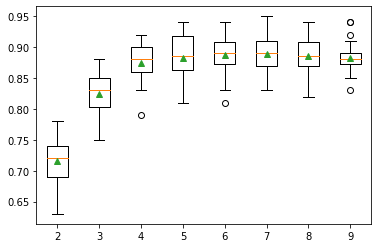

In [59]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# 평가 모델 목록 생성
def get_models():
	models = dict()

	# 특성을 두 개에서 아홉 개까지 선택하도록 8개의 모델 생성
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])

	return models

# 모델 평가
def evaluate_model(model, X, y):
	# k폴드 교차 검증
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# 모델 평가
	return cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# 데이터 세트
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# 평가 모델들
models = get_models()

# 결과 저장
results, names = list(), list()

# 모델에 따른 평가
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# 특성 개수에 따른 정확도
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

##### 의사 결정 나무 분류

```
특성 개수 자동 탐색
```

In [62]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# 데이터 세트
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# 재귀적 특성 제거
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

# 모델 평가
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# 평균과 표준편차 확인
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.885 (0.030)


##### 의사 결정 나무 분류

```
선택된 특성 확인 방법
 - 2, 3, 4, 6, 8번 선택
```

In [72]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# 데이터 세트
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# 재귀적 특성 제거
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X, y)

# 선택된 특성 확인
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000
